# **Glossário**

1. Introdução
2. Importação das tabelas e das bibliotecas
3. Limpeza das tabelas
4. Análise comparativa
5. Conclusão

---
 
## **1. Introdução**

O desafio foi proposto como parte do processo seletivo da empresa Tom Educação. Para o desafio foi solicitado uma comparação entre duas folhas de pagamento, a da própria empresa e do Governo (parceiro da empresa na educação pública).

---

## **1.1 Contexto**

A Tom gerencia escolas públicas em parceria com o governo e remunera seus profissionais com base na carga horária de regência e não-regência contratada. O reconhecimento e a validação dessas horas dependem de um processo complexo conduzido pela equipe de dados, que compara as horas contratadas com as registradas num sistema externo de fiscalização. Internamente, a empresa mantém sua própria folha de pagamento, onde constam as horas efetivamente pagas a cada profissional a cada mês.

---

## **1.2 Sobre os dados**

Os dados foram disponibilizados via e-mail, e correspondem a 6 tabelas + auxiliar, contendo informações a serem preenchidas e informações como a folha de pagamento (Tom e Governo), valores por escola e relação de professores.

---


## **2. Importação das tabelas e das bibliotecas**

### **Bibliotecas utilizadas**

- pandas e numpy: Manipulação e limpeza dos dados
- seaborn e matplotlib: Visualização dos dados



In [304]:
# Manipulação dos dados
import pandas as pd
import numpy as np

# Visualização dos dados
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings

filterwarnings('ignore')

# Manipulacao de arquivos e caminhos
from pathlib import Path

ROOT_DIR = Path().cwd().parent
DATA_DIR = ROOT_DIR / "data"
FILE_PATH = DATA_DIR / "data.xlsx"

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

sns.set_theme(
    context="notebook",
    style="whitegrid",
    palette="colorblind",
    font="Arial",
    font_scale=1.0
)
plt.rc("figure", figsize=(12, 6), dpi=120)


### **Leitura das tabelas**

#### **Foram disponibilizadas 6 tabelas no total (não incluindo a tabela auxiliar), são elas:**

1. Resumo executivo: Deverá ser preenchido com informações de pagamento
2. Análise CH por Escola:  Deverá ser preenchido com informações de pagamento
3. BD_Tom Folha: Representa a folha de pagamento registrada pela Tom
4. BD_Sistema Gov: Representa a folha de pagamento registrada pelo Governo
5. Valores por escola: Representa o valor da CH para cada escola presente no sistema
6. Página30 (Professores): Representa todos os professores cadastros pelo sistema


In [305]:
sheets = pd.ExcelFile(FILE_PATH)

names = sheets.sheet_names

names.remove('Auxiliares>>>>')

In [306]:
SHEET_KEYS = {
    i: name
    for i, name in enumerate(names)
}

SHEET_KEYS

{0: 'Resumo Executivo',
 1: 'Análise CH por Escola',
 2: 'BD_Tom Folha',
 3: 'BD_SistemaGov',
 4: 'Valores por escola',
 5: 'Página30'}

In [307]:
hc_per_school = pd.read_excel(FILE_PATH, sheet_name=SHEET_KEYS[1])

print(hc_per_school.shape)
hc_per_school.head()

(128, 9)


,Mês,Escola,CÓDIGO ESCOLA,Valor Unitário Carga Horária,CH Regência,CH Sem Regência,Valor Regência,Valor Sem Regência,Valor CH Mensal
0,janeiro,ESCOLA A,ABC1,NaN,NaN,NaN,NaN,NaN,NaN
1,janeiro,ESCOLA B,ABC2,NaN,NaN,NaN,NaN,NaN,NaN
2,janeiro,ESCOLA C,ABC3,NaN,NaN,NaN,NaN,NaN,NaN
3,janeiro,ESCOLA D,ABC4,NaN,NaN,NaN,NaN,NaN,NaN
4,janeiro,ESCOLA E,ABC5,NaN,NaN,NaN,NaN,NaN,NaN


In [308]:
tom_payroll = pd.read_excel(FILE_PATH, sheet_name=SHEET_KEYS[2])

print(tom_payroll.shape)
tom_payroll.head()

(3085, 12)


,Mês,Escola,CodEscola,Nome,CodFuncionario,SITUACAO,ADM,DESCRICAO_CARGO,DESCRICAO_VERBA,Horas Mes,Categoria,Dt demissão
0,Fevereiro,ESCOLA A,ABC1,Andressa Aguiar,100.0,Trabalhando,2025-02-03,COORDENADOR(A) DE CURSO,HORAS,70.0,NAO REGENCIA,NaT
1,Fevereiro,ESCOLA A,ABC1,Andressa Aguiar,100.0,Trabalhando,2025-02-03,PROFESSOR(A),HORAS,45.0,REGENCIA,NaT
2,Fevereiro,ESCOLA A,ABC1,Márcio Wagner,101.0,Trabalhando,2025-02-03,PROFESSOR(A),HORAS,27.0,REGENCIA,NaT
3,Fevereiro,ESCOLA A,ABC1,Igor Souza Quirino,102.0,Trabalhando,2025-02-03,PROFESSOR(A),HORAS,49.5,REGENCIA,NaT
4,Fevereiro,ESCOLA A,ABC1,João Miguel Oliveira Vieira,103.0,Trabalhando,2025-02-03,PROFESSOR(A),HORAS,40.5,REGENCIA,NaT


In [309]:
gov_payroll = pd.read_excel(FILE_PATH, sheet_name=SHEET_KEYS[3])

print(gov_payroll.shape)
gov_payroll.head()

(6780, 14)


,Mês,Escola,CodEscola,Nome Funcionario,CodFuncionario,Tipo,DisciplinaFuncao,DisciplinaFuncaoDescricao,PeriodoIni,PeriodoFim,DiasTrabalhados,CHSuprimento,CHDiaria,CHPeriodo
0,Fevereiro,ESCOLA Z,ABC23,Bruna Diniz,680,REGENCIA,6279,LITER ART E MOVIMENTO I,2025-02-03,2025-02-28,26,8,1.142857,29.714282
1,Fevereiro,ESCOLA Z,ABC23,Bruna Diniz,680,REGENCIA,6363,ELETIVA I,2025-02-03,2025-02-28,26,4,0.571428,14.857128
2,Fevereiro,ESCOLA Z,ABC23,Yolanda Sales,681,REGENCIA,704,ARTE,2025-02-03,2025-02-28,26,8,1.142857,29.714282
3,Fevereiro,ESCOLA Z,ABC23,Yolanda Sales,681,REGENCIA,732,ARTE II,2025-02-03,2025-02-28,26,2,0.285714,7.428564
4,Fevereiro,ESCOLA Z,ABC23,Yolanda Sales,681,REGENCIA,5641,PROJETO DE VIDA I,2025-02-03,2025-02-28,26,25,3.571428,92.857128


In [310]:
school_values = pd.read_excel(FILE_PATH, sheet_name=SHEET_KEYS[4])

print(school_values.shape)
school_values.head()

(32, 3)


,Escola,CodEscola,Valor Unitário Carga Horária
0,ESCOLA Z,ABC23,23.09
1,ESCOLA N,ABC14,29.27
2,ESCOLA O,ABC15,29.27
3,ESCOLA E,ABC5,29.27
4,ESCOLA F,ABC6,27.21


In [311]:
teachers_match = pd.read_excel(FILE_PATH, sheet_name=SHEET_KEYS[5])

teachers_match.head()

,UNIQUE,Unnamed: 1,Unnamed: 2,conit,Unnamed: 4,UNIQUE.1,CÓDIGO ESCOLA,Escola
0,61008303100,100,Andressa Aguiar,1,NaN,41128656.0,ABC1,ESCOLA A
1,9966162925,101,Márcio Wagner,1,NaN,41129792.0,ABC2,ESCOLA B
2,638731925,102,Igor Souza Quirino,1,NaN,41131479.0,ABC3,ESCOLA C
3,5743855927,103,João Miguel Oliveira Vieira,1,NaN,41131908.0,ABC4,ESCOLA D
4,2334064920,104,Dennis Oshima,1,NaN,41135784.0,ABC5,ESCOLA E


---

## **3. Limpeza das tabelas**

As tabelas podem e provalmente devem conter inconsistências a respeito dos dados. Dessa forma, é essencial garantir que todas estejam em conformidade para que a análise e a comparação entre os resultados seja precisa. Vamos começar, verificando informações básicas, como distribuição para tabelas que tiveram campos numéricos, número de dados faltantes, tipos de colunas e correção de valores imediatos. Além disso, vamos renomear alguns campos que podem apresentar dificuldades de manipulação, visto que, as colunas não estão padronizadas e contém caracteres especiais.

Verificando tabela de Carga Horária por escola (a ser preenchida)

In [312]:
print(hc_per_school[['Mês', 'Escola']].info())

grouped_schools = hc_per_school.groupby('Mês')['Escola'].count()

grouped_schools

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mês     128 non-null    object
 1   Escola  128 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB
None


Mês
abril        32
fevereiro    32
janeiro      32
março        32
Name: Escola, dtype: int64

In [313]:
hc_per_school = hc_per_school.rename(columns={
    'Mês': 'mes',
    'Escola': 'escola',
    'CÓDIGO ESCOLA': 'codigo_escola',
    'Valor Unitário Carga Horária': 'valor_unitario_carga_horaria',
    'CH Regência': 'ch_regencia',
    'Valor Regência': 'valor_regencia',
    'Valor Sem Regência': 'valor_sem_regencia',
    'Valor CH Mensal': 'valor_ch_mensal',
})

hc_per_school.columns

Index(['mes', 'escola', 'codigo_escola', 'valor_unitario_carga_horaria',
       'ch_regencia', 'CH Sem Regência', 'valor_regencia',
       'valor_sem_regencia', 'valor_ch_mensal'],
      dtype='object')

In [314]:
print(hc_per_school[['mes', 'escola']].isna().sum())
print(hc_per_school[['mes', 'escola']].duplicated(keep=False).sum())

mes       0
escola    0
dtype: int64
0


Verificando a tabela de Folha de Pagamentos da empresa

In [315]:
tom_payroll = tom_payroll.rename(columns={
    'Mês': 'mes',
    'Escola': 'escola',
    'CodEscola': 'codigo_escola',
    'Nome': 'nome',
    'CodFuncionario': 'codigo_funcionario',
    'SITUACAO': 'situacao',
    'ADM': 'data_admissao',
    'DESCRICAO_CARGO': 'descricao_cargo',
    'DESCRICAO_VERBA': 'descricao_verba',
    'Horas Mes': 'ch_total',
    'Categoria': 'categoria',
    'Dt demissão': 'data_demissao',
})

print(tom_payroll.info())
print(tom_payroll.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3085 entries, 0 to 3084
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   mes                 3085 non-null   object        
 1   escola              3085 non-null   object        
 2   codigo_escola       3085 non-null   object        
 3   nome                3078 non-null   object        
 4   codigo_funcionario  3078 non-null   float64       
 5   situacao            3085 non-null   object        
 6   data_admissao       1964 non-null   datetime64[ns]
 7   descricao_cargo     3085 non-null   object        
 8   descricao_verba     3085 non-null   object        
 9   ch_total            3085 non-null   float64       
 10  categoria           3085 non-null   object        
 11  data_demissao       189 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(8)
memory usage: 289.3+ KB
None
       codigo_funcionario      

In [316]:
tom_payroll.isna().sum()

mes                      0
escola                   0
codigo_escola            0
nome                     7
codigo_funcionario       7
situacao                 0
data_admissao         1121
descricao_cargo          0
descricao_verba          0
ch_total                 0
categoria                0
data_demissao         2896
dtype: int64

In [317]:
tom_payroll[(tom_payroll['nome'].isna()) | (tom_payroll['codigo_funcionario'].isna())]

,mes,escola,codigo_escola,nome,codigo_funcionario,situacao,data_admissao,descricao_cargo,descricao_verba,ch_total,categoria,data_demissao
1994,Abril,ESCOLA A,ABC1,NaN,NaN,Trabalhando,NaT,PROFESSOR(A),HORAS,54.0,REGENCIA,NaT
2047,Abril,ESCOLA G,ABC7,NaN,NaN,Trabalhando,NaT,PROFESSOR(A),HORAS,18.9,REGENCIA,NaT
2640,Abril,ESCOLA W,ABC21,NaN,NaN,Trabalhando,NaT,PROFESSOR(A),HORAS,18.0,REGENCIA,NaT
2641,Abril,ESCOLA W,ABC21,NaN,NaN,Trabalhando,NaT,PROFESSOR(A),HORAS,20.0,REGENCIA,NaT
2800,Abril,ESCOLA Z,ABC23,NaN,NaN,Trabalhando,NaT,COORDENADOR(A) PEDAGOGICO,HORAS,100.0,NAO REGENCIA,NaT
2859,Abril,ESCOLA J,ABC10,NaN,NaN,Trabalhando,NaT,PROFESSOR(A),HORAS,14.7,REGENCIA,NaT
3048,Abril,ESCOLA M,ABC13,NaN,NaN,Trabalhando,NaT,PROFESSOR(A),HORAS,12.6,REGENCIA,NaT


Registros faltantes podem ser problemáticos ao momento em que formos realizar a comparação entre as bases. Dessa forma, é essencial garantir que estes registros sejam tratados e removidos da base. Uma vez que, por não apresentarem "nome" e nem um "codigo_funcionario" tornam-se impossíveis de serem identificados.

In [318]:
tom_payroll = tom_payroll.dropna(subset=['codigo_funcionario', 'nome'])
print(tom_payroll.shape)

(3078, 12)


In [319]:
tom_payroll.duplicated(keep=False).sum()

np.int64(4)

Além disso, a base contem duplicatas. Como são registros totalmente idênticos, devemos removê-los, afim de não inflar a contagem final e comparação entre as bases.

In [320]:
tom_payroll[tom_payroll.duplicated(keep=False)]

,mes,escola,codigo_escola,nome,codigo_funcionario,situacao,data_admissao,descricao_cargo,descricao_verba,ch_total,categoria,data_demissao
1167,Março,ESCOLA AE,ABC28,Felipe Zago,411.0,Trabalhando,2025-03-06,PROFESSOR(A),HORAS,9.0,REGENCIA,NaT
1168,Março,ESCOLA AE,ABC28,Felipe Zago,411.0,Trabalhando,2025-03-06,PROFESSOR(A),HORAS,9.0,REGENCIA,NaT
1332,Março,ESCOLA AH,ABC31,Santiago Souza Tavares,893.0,Trabalhando,2025-03-05,PROFESSOR(A),HORAS,30.0,REGENCIA,NaT
1333,Março,ESCOLA AH,ABC31,Santiago Souza Tavares,893.0,Trabalhando,2025-03-05,PROFESSOR(A),HORAS,30.0,REGENCIA,NaT


In [321]:
tom_payroll = tom_payroll.drop_duplicates(keep='first')

tom_payroll.duplicated(keep=False).sum()

np.int64(0)

Verificando tabela do Governo

In [322]:
gov_payroll = gov_payroll.rename(columns={
    'Mês': 'mes',
    'Escola': 'escola',
    'CodEscola': 'codigo_escola',
    'Nome Funcionario': 'nome_funcionario',
    'CodFuncionario': 'codigo_funcionario',
    'Tipo': 'categoria',
    'DisciplinaFuncao': 'disciplina_funcao',
    'DisciplinaFuncaoDescricao': 'disciplina_funcao_descricao',
    'PeriodoIni': 'periodo_ini',
    'PeriodoFim': 'periodo_fim',
    'DiasTrabalhados': 'dias_trabalhados',
    'CHSuprimento': 'ch_suprimento',
    'CHDiaria': 'ch_diaria',
    'CHPeriodo': 'ch_total',
})


print(gov_payroll.info())
print(gov_payroll.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6780 entries, 0 to 6779
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   mes                          6780 non-null   object        
 1   escola                       6780 non-null   object        
 2   codigo_escola                6780 non-null   object        
 3   nome_funcionario             6780 non-null   object        
 4   codigo_funcionario           6780 non-null   int64         
 5   categoria                    6780 non-null   object        
 6   disciplina_funcao            6780 non-null   int64         
 7   disciplina_funcao_descricao  6780 non-null   object        
 8   periodo_ini                  6780 non-null   datetime64[ns]
 9   periodo_fim                  6780 non-null   datetime64[ns]
 10  dias_trabalhados             6780 non-null   int64         
 11  ch_suprimento                6780 non-null 

In [323]:
gov_payroll.isna().sum()

mes                            0
escola                         0
codigo_escola                  0
nome_funcionario               0
codigo_funcionario             0
categoria                      0
disciplina_funcao              0
disciplina_funcao_descricao    0
periodo_ini                    0
periodo_fim                    0
dias_trabalhados               0
ch_suprimento                  0
ch_diaria                      0
ch_total                       0
dtype: int64

In [324]:
gov_payroll.duplicated(keep=False).sum()

np.int64(10)

Assim como na base da empresa, a base do Governo possui valores duplicados. Como já explicado anteriormente, devemos remover estes registros.

In [325]:
gov_payroll[gov_payroll.duplicated(keep=False)]

,mes,escola,codigo_escola,nome_funcionario,codigo_funcionario,categoria,disciplina_funcao,disciplina_funcao_descricao,periodo_ini,periodo_fim,dias_trabalhados,ch_suprimento,ch_diaria,ch_total
5162,Abril,ESCOLA H,ABC8,Naiara Nakashima,801,REGENCIA,704,ARTE,2025-04-01,2025-04-06,6,20,2.857142,17.142852
5166,Abril,ESCOLA H,ABC8,Naiara Nakashima,801,REGENCIA,704,ARTE,2025-04-01,2025-04-06,6,20,2.857142,17.142852
5269,Abril,ESCOLA M,ABC13,Luiza Dias,871,REGENCIA,367,REDACAO E LEITURA,2025-04-30,2025-04-30,1,8,1.142857,1.142857
5271,Abril,ESCOLA M,ABC13,Luiza Dias,871,REGENCIA,367,REDACAO E LEITURA,2025-04-30,2025-04-30,1,8,1.142857,1.142857
5673,Abril,ESCOLA P,ABC16,Cauê Muniz,603,REGENCIA,201,MATEMATICA,2025-04-01,2025-04-02,2,16,2.285714,4.571428
5674,Abril,ESCOLA P,ABC16,Cauê Muniz,603,REGENCIA,201,MATEMATICA,2025-04-03,2025-04-29,27,8,1.142857,30.857139
5675,Abril,ESCOLA P,ABC16,Cauê Muniz,603,REGENCIA,201,MATEMATICA,2025-04-30,2025-04-30,1,16,2.285714,2.285714
5676,Abril,ESCOLA P,ABC16,Cauê Muniz,603,REGENCIA,201,MATEMATICA,2025-04-01,2025-04-02,2,16,2.285714,4.571428
5677,Abril,ESCOLA P,ABC16,Cauê Muniz,603,REGENCIA,201,MATEMATICA,2025-04-03,2025-04-29,27,8,1.142857,30.857139
5678,Abril,ESCOLA P,ABC16,Cauê Muniz,603,REGENCIA,201,MATEMATICA,2025-04-30,2025-04-30,1,16,2.285714,2.285714


In [326]:
gov_payroll = gov_payroll.drop_duplicates(keep='first')

gov_payroll.duplicated(keep=False).sum()

np.int64(0)

Verificando tabela de Valores por Escola

In [327]:
school_values = school_values.rename(columns={
    'Escola': 'escola',
    'CodEscola': 'codigo_escola',
    'Valor Unitário Carga Horária': 'valor_unitario_carga_horaria',
})

print(school_values.info())
print(school_values.describe())
print(school_values.isna().sum())
print(school_values.duplicated(keep=False).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   escola                        32 non-null     object 
 1   codigo_escola                 32 non-null     object 
 2   valor_unitario_carga_horaria  32 non-null     float64
dtypes: float64(1), object(2)
memory usage: 900.0+ bytes
None
       valor_unitario_carga_horaria
count                     32.000000
mean                      26.765000
std                        2.956628
min                       23.090000
25%                       23.090000
50%                       27.210000
75%                       29.270000
max                       31.390000
escola                          0
codigo_escola                   0
valor_unitario_carga_horaria    0
dtype: int64
0


In [328]:
teachers_match = teachers_match.rename(columns={
    'Unnamed: 1': 'cod_funcionario',
    'Unnamed: 2': 'nome_funcionario',
    'conit': 'conit',
    'Unnamed: 4': 'empty',
    'CÓDIGO ESCOLA': 'codigo_escola',
    'Escola': 'escola',
})

teachers_match = teachers_match.drop(columns=['empty', 'conit', 'UNIQUE.1', 'codigo_escola', 'escola'])

print(teachers_match.columns)
print(teachers_match.info())
print(teachers_match.isna().sum())
print(teachers_match.duplicated().sum())

Index(['UNIQUE', 'cod_funcionario', 'nome_funcionario'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   UNIQUE            1686 non-null   int64 
 1   cod_funcionario   1686 non-null   int64 
 2   nome_funcionario  1686 non-null   object
dtypes: int64(2), object(1)
memory usage: 39.6+ KB
None
UNIQUE              0
cod_funcionario     0
nome_funcionario    0
dtype: int64
0


Na base da empresa, observamos que código do funcionário está como objeto, enquanto na base que contem todos os professores, o seus IDs (codigos) estao como "int". Para garantir a integridade de futuras junções, vamos alterar o tipo dessa coluna.

In [329]:
tom_payroll['codigo_funcionario'] = pd.to_numeric(tom_payroll['codigo_funcionario']).astype('Int64')

----


### **4. Análise Comparativa**

#### Metodologias de cálculo

- Tom Educação: ch_semanal * fator de regência (4,5 ou 5)
- Governo: ch_diario * dias_trabalhados

**Como tornar as bases comparativas?**

Sabemos que a empresa calcula sua carga horária mensal com base em dois aspectos: o ch_semanal e o fator de regência. Esse ch_semanal é um outro cálculo realizado pela Tom, que diz respeito ao um cruzamento de Professor e tipo de cargo na própria base do Governo. Isto é, para cada professor, em cada determinada escola e no determinado mês, a empresa reúne a informação de carga diária do Professor por tipo de cargo e posteriormente o multiplica por 7 (dias da semana) e o fator de regência (Regência ou Não Regência).

Já o Governo, aborda uma metodologia mais simples, com base no ch_diário de cada Professor e respectivamente, seus dias trabalhados, o cálculo de sua carga horária mensal é não só divido por mês, escola e funcionário, mas também por disciplina. Dessa forma, decompõe-se não somente suas horas por regência ou não regencia, mas também por disciplina.

**Problemas gerados**

- O primeiro problema gerado diz respeito a exatamente ao cálculo de cada base: suas fórmulas. Veja bem, se Tom multiplica a carga horária do professor por 7 (dias da semana) e posteriormente por um fator de 4,5 ou 5 (que representariam semanas no mês), estamos assumindo que aqueles professores trabalham 7 dias por semana, todas as semanas do mês. Enquanto isso, na base do Governo é levado em conta os "dias reais" de trabalho de cada professor, então, por exemplo, em Fevereiro já teriamos nossa primeira diferença, visto que o mês possui menos dias quando comparado aos outros meses. Além disso, assumimos que a aquele professor está sempre presente em sala ou em seu respectivo cargo o que de fato pode não acontecer.

In [330]:
tom_payroll['fator'] = tom_payroll['categoria'].map({
    'REGENCIA': 4.5,
    'NAO REGENCIA': 5
})

tom_payroll.head()

,mes,escola,codigo_escola,nome,codigo_funcionario,situacao,data_admissao,descricao_cargo,descricao_verba,ch_total,categoria,data_demissao,fator
0,Fevereiro,ESCOLA A,ABC1,Andressa Aguiar,100,Trabalhando,2025-02-03,COORDENADOR(A) DE CURSO,HORAS,70.0,NAO REGENCIA,NaT,5.0
1,Fevereiro,ESCOLA A,ABC1,Andressa Aguiar,100,Trabalhando,2025-02-03,PROFESSOR(A),HORAS,45.0,REGENCIA,NaT,4.5
2,Fevereiro,ESCOLA A,ABC1,Márcio Wagner,101,Trabalhando,2025-02-03,PROFESSOR(A),HORAS,27.0,REGENCIA,NaT,4.5
3,Fevereiro,ESCOLA A,ABC1,Igor Souza Quirino,102,Trabalhando,2025-02-03,PROFESSOR(A),HORAS,49.5,REGENCIA,NaT,4.5
4,Fevereiro,ESCOLA A,ABC1,João Miguel Oliveira Vieira,103,Trabalhando,2025-02-03,PROFESSOR(A),HORAS,40.5,REGENCIA,NaT,4.5


In [331]:
more_than_1_school = tom_payroll.groupby(['mes', 'codigo_funcionario', 'categoria'])['codigo_escola'].count().reset_index()

(more_than_1_school['codigo_escola'] > 1).sum()

np.int64(371)

Existem professores que trabalham em mais de uma escola e analisando os dados percebemos que professores que possuem múltiplos cargos, isto é, lecionam em múltiplas matérias ou cargos de não regência. Este é um impasse a ser resolvido, visto que podemos ter professores que lecionam em quantidades de dias diferentes para cada matéria. Por isso, vamos calcular o CH Real do Governo utilizando o CH diario * Dias trabalhados e comparar se todos os resultados batem

In [332]:
gov_payroll_copy = gov_payroll.copy()

ch_real_gov = np.round(gov_payroll_copy['ch_diaria'] * gov_payroll_copy['dias_trabalhados'], 3)

(ch_real_gov - np.round(gov_payroll_copy['ch_total'], 3)).sum()

np.float64(0.0)

Em termos de cálculo próprio, a base do Governo **não apresenta discrepâncias em sua carga horária total**

Como explicitado anteriormente, a base do Governo leva em conta, também, as disciplinas ou diferentes funções exercidas por cada profissional. Além disso, existem casos em que um professor pode aumentar ou diminuir sua carga horária em uma mesma disciplina, o que causa valores descontínuos dentro do período (mês) analisado, porém lineares em relação aos dias do mês (existem casos onde começo e fim do período de trabalho são descontínuos). Dessa forma, é necessário garantir que estes registros possam ser compáraveis, por isso aplicaremos algumas transformações nos dados:

- data_inicio = primeira data encontrada
- data_fim = última data encontrada
- dias_trabalhados = calculado a partir das datas encontradas
- ch_periodo = somar
- ch_diario = ch_periodo / dia_trabalhados (já calculados)

In [333]:
gov_payroll_copy = gov_payroll.copy()

gov_payroll_copy['periodo_ini'] = pd.to_datetime(gov_payroll_copy['periodo_ini'], dayfirst=True)
gov_payroll_copy['periodo_fim'] = pd.to_datetime(gov_payroll_copy['periodo_fim'], dayfirst=True)

In [334]:
agg_keys = ['mes', 'codigo_escola', 'codigo_funcionario', 'disciplina_funcao']

In [335]:
gov_payroll_copy = gov_payroll_copy.sort_values(agg_keys + ['periodo_ini'])

In [336]:

def merge_continuous_dates(df):
    df = df.sort_values('periodo_ini')
    merged = []
    for _, row in df.iterrows():
        rec = row.to_dict()
        rec['dias_trabalhados'] = row['dias_trabalhados']
        rec['ch_total'] = row['ch_total']
        rec['ch_diaria'] = row['ch_total'] / row['dias_trabalhados']

        if not merged:
            merged.append(rec)
        else:
            last = merged[-1]
            if row['periodo_ini'] == last['periodo_fim'] + pd.Timedelta(days=1):
                last['periodo_fim'] = row['periodo_fim']
                last['dias_trabalhados'] += rec['dias_trabalhados']
                last['ch_total'] += rec['ch_total']
                last['ch_diaria'] = last['ch_total'] / last['dias_trabalhados']
            else:
                merged.append(rec)
    return pd.DataFrame(merged)

In [337]:
merged = (
    gov_payroll_copy
    .groupby(agg_keys, group_keys=False)
    .apply(merge_continuous_dates)
    .reset_index(drop=True)
)

In [338]:
print(merged.shape)
merged.head()

(6406, 14)


,mes,escola,codigo_escola,nome_funcionario,codigo_funcionario,categoria,disciplina_funcao,disciplina_funcao_descricao,periodo_ini,periodo_fim,dias_trabalhados,ch_suprimento,ch_diaria,ch_total
0,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,REGENCIA,4024,NOCOES DE DIREITO,2025-04-01,2025-04-30,30,2,0.285714,8.57142
1,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,REGENCIA,4129,PRINCIPIOS DE ADMINISTRACAO,2025-04-01,2025-04-30,30,2,0.285714,8.57142
2,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,REGENCIA,4450,RECURSOS HUMANOS,2025-04-01,2025-04-30,30,4,0.571428,17.14284
3,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,REGENCIA,4767,TECNOLOGIAS E FERRAM DE GESTAO,2025-04-01,2025-04-30,30,2,0.285714,8.57142
4,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,NAO REGENCIA,9220,COORD DE CURSO,2025-04-01,2025-04-30,30,15,2.142857,64.28571


In [339]:
gov_payroll = merged

Agora, com os dados já tratados em relação a alterações lineares em dias de trabalho, bem como ch_diária, devemos tratar os casos em que estas datas não são lineares. Assumiremos que estes registros são apenas falhas de inserção e relatam a uma mesma disciplina ou cargo (caso já existente) para este mesmo profissional.

In [340]:
find_double_discipline = (
    gov_payroll
    .groupby(['mes', 'codigo_escola', 'codigo_funcionario', 'disciplina_funcao'])
    .size()
    .reset_index(name='n_ocorrencias')
)

double_or_more_ocurrencies = find_double_discipline[find_double_discipline['n_ocorrencias'] > 1]

print(len(double_or_more_ocurrencies))
double_or_more_ocurrencies

22


,mes,codigo_escola,codigo_funcionario,disciplina_funcao,n_ocorrencias
93,Abril,ABC10,729,401,3
203,Abril,ABC12,817,704,3
299,Abril,ABC13,871,367,2
301,Abril,ABC13,872,301,3
514,Abril,ABC15,1748,106,2
522,Abril,ABC16,605,201,4
539,Abril,ABC16,612,301,4
575,Abril,ABC16,623,301,4
668,Abril,ABC17,908,901,3
682,Abril,ABC18,667,6362,3


In [341]:
mask = (
    (gov_payroll['mes'] == 'Abril') &
    gov_payroll['codigo_escola'].isin(double_or_more_ocurrencies['codigo_escola']) &
    gov_payroll['codigo_funcionario'].isin(double_or_more_ocurrencies['codigo_funcionario']) &
    gov_payroll['disciplina_funcao'].isin(double_or_more_ocurrencies['disciplina_funcao'])
)

gov_payroll[mask]

,mes,escola,codigo_escola,nome_funcionario,codigo_funcionario,categoria,disciplina_funcao,disciplina_funcao_descricao,periodo_ini,periodo_fim,dias_trabalhados,ch_suprimento,ch_diaria,ch_total
93,Abril,ESCOLA J,ABC10,Kauê Sales,729,REGENCIA,401,GEOGRAFIA,2025-04-01,2025-04-29,29,14,2.000000,58.000000
94,Abril,ESCOLA J,ABC10,Kauê Sales,729,REGENCIA,401,GEOGRAFIA,2025-04-11,2025-04-30,20,11,1.692857,33.857132
95,Abril,ESCOLA J,ABC10,Kauê Sales,729,REGENCIA,401,GEOGRAFIA,2025-04-30,2025-04-30,1,22,3.142857,3.142857
205,Abril,ESCOLA L,ABC12,Jacira Goulart,817,REGENCIA,704,ARTE,2025-04-01,2025-04-29,29,6,0.857142,24.857118
206,Abril,ESCOLA L,ABC12,Jacira Goulart,817,REGENCIA,704,ARTE,2025-04-11,2025-04-30,20,10,1.442857,28.857134
207,Abril,ESCOLA L,ABC12,Jacira Goulart,817,REGENCIA,704,ARTE,2025-04-30,2025-04-30,1,20,2.857142,2.857142
302,Abril,ESCOLA M,ABC13,Luiza Dias,871,REGENCIA,106,LINGUA PORTUGUESA,2025-04-01,2025-04-30,30,9,1.328571,39.857134
303,Abril,ESCOLA M,ABC13,Luiza Dias,871,REGENCIA,367,REDACAO E LEITURA,2025-04-01,2025-04-29,29,4,0.571428,16.571412
304,Abril,ESCOLA M,ABC13,Luiza Dias,871,REGENCIA,367,REDACAO E LEITURA,2025-04-11,2025-04-30,20,4,0.599999,11.999989
306,Abril,ESCOLA M,ABC13,Isabella Lemos,872,REGENCIA,301,CIENCIAS,2025-04-01,2025-04-06,6,12,1.714285,10.285710


In [342]:
dup_keys = double_or_more_ocurrencies[['mes','codigo_escola','codigo_funcionario','disciplina_funcao']]


to_agg   = gov_payroll.merge(dup_keys, on=agg_keys, how='inner')
to_keep  = gov_payroll.merge(dup_keys, on=agg_keys, how='left', indicator=True)
to_keep  = to_keep[to_keep['_merge']=='left_only'].drop(columns=['_merge'])


to_agg.shape,to_keep.shape

((65, 14), (6341, 14))

In [343]:
numeric_sum = ['ch_total']
date_minmax = {'periodo_ini':'min','periodo_fim':'max'}
agg_first   = {c:'first' for c in gov_payroll.columns
               if c not in agg_keys + numeric_sum + list(date_minmax)}

agg_dict = {**agg_first, **date_minmax, **{c:'sum' for c in numeric_sum}}

In [344]:
agg = (
    to_agg
    .groupby(agg_keys, as_index=False)
    .agg(agg_dict)
)

agg['ch_diaria'] = agg['ch_total'] / agg['dias_trabalhados']
agg['dias_trabalhados'] = (agg['periodo_fim'] - agg['periodo_ini']).dt.days + 1

In [345]:
agg.head()

,mes,codigo_escola,codigo_funcionario,disciplina_funcao,escola,nome_funcionario,categoria,disciplina_funcao_descricao,dias_trabalhados,ch_suprimento,ch_diaria,periodo_ini,periodo_fim,ch_total
0,Abril,ABC10,729,401,ESCOLA J,Kauê Sales,REGENCIA,GEOGRAFIA,30,14,3.275862,2025-04-01,2025-04-30,94.999989
1,Abril,ABC12,817,704,ESCOLA L,Jacira Goulart,REGENCIA,ARTE,30,6,1.950738,2025-04-01,2025-04-30,56.571394
2,Abril,ABC13,871,367,ESCOLA M,Luiza Dias,REGENCIA,REDACAO E LEITURA,30,4,0.985221,2025-04-01,2025-04-30,28.571401
3,Abril,ABC13,872,301,ESCOLA M,Isabella Lemos,REGENCIA,CIENCIAS,30,12,6.690472,2025-04-01,2025-04-30,40.142829
4,Abril,ABC15,1748,106,ESCOLA O,Antônia Cavalcanti,REGENCIA,LINGUA PORTUGUESA,20,6,5.142856,2025-04-11,2025-04-30,102.857120


In [346]:
final = pd.concat([to_keep, agg], ignore_index=True, sort=False)

final.head()

,mes,escola,codigo_escola,nome_funcionario,codigo_funcionario,categoria,disciplina_funcao,disciplina_funcao_descricao,periodo_ini,periodo_fim,dias_trabalhados,ch_suprimento,ch_diaria,ch_total
0,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,REGENCIA,4024,NOCOES DE DIREITO,2025-04-01,2025-04-30,30,2,0.285714,8.57142
1,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,REGENCIA,4129,PRINCIPIOS DE ADMINISTRACAO,2025-04-01,2025-04-30,30,2,0.285714,8.57142
2,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,REGENCIA,4450,RECURSOS HUMANOS,2025-04-01,2025-04-30,30,4,0.571428,17.14284
3,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,REGENCIA,4767,TECNOLOGIAS E FERRAM DE GESTAO,2025-04-01,2025-04-30,30,2,0.285714,8.57142
4,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,NAO REGENCIA,9220,COORD DE CURSO,2025-04-01,2025-04-30,30,15,2.142857,64.28571


In [347]:
dup_counts = (
    final
    .groupby(['mes', 'codigo_escola', 'codigo_funcionario', 'disciplina_funcao'])
    .size()
    .reset_index(name='n_ocorrencias')
)


still_duplicates = dup_counts[dup_counts['n_ocorrencias'] > 1]

print(still_duplicates)

Empty DataFrame
Columns: [mes, codigo_escola, codigo_funcionario, disciplina_funcao, n_ocorrencias]
Index: []


Com a base do Governo já tratada no quesito dos casos observamos, vamos agora analisar como Tom se comporta e reflete estes casos de descontinuidade.

In [348]:
grouped_tom =(
    tom_payroll
    .groupby(['mes', 'codigo_escola', 'codigo_funcionario', 'categoria', 'descricao_cargo'])
    .size()
    .reset_index(name='n_ocorrencias')
)

double_or_more_ocurrencies_tom = grouped_tom[grouped_tom['n_ocorrencias'] > 1]

print(double_or_more_ocurrencies_tom.shape)
double_or_more_ocurrencies_tom.head()

(268, 6)


,mes,codigo_escola,codigo_funcionario,categoria,descricao_cargo,n_ocorrencias
45,Abril,ABC10,729,REGENCIA,PROFESSOR(A),2
68,Abril,ABC11,833,REGENCIA,PROFESSOR(A),2
72,Abril,ABC11,837,REGENCIA,PROFESSOR(A),2
76,Abril,ABC11,841,REGENCIA,PROFESSOR(A),2
77,Abril,ABC11,842,REGENCIA,PROFESSOR(A),2


In [349]:
mask = (tom_payroll['mes'] == 'Abril') & (tom_payroll['codigo_escola'] == 'ABC10') & (tom_payroll['codigo_funcionario'] == 729)

tom_payroll[mask]

,mes,escola,codigo_escola,nome,codigo_funcionario,situacao,data_admissao,descricao_cargo,descricao_verba,ch_total,categoria,data_demissao,fator
2865,Abril,ESCOLA J,ABC10,Kauê Sales,729,Trabalhando,NaT,PROFESSOR(A),HORAS,63.0,REGENCIA,NaT,4.5
2866,Abril,ESCOLA J,ABC10,Kauê Sales,729,Trabalhando,NaT,PROFESSOR(A),HORAS,16.0,REGENCIA,NaT,4.5


Na base da empresa, percebemos casos semelhantes. Como não possuímos ch_diario, nem dias de início e final de período trabalhado para estes registros, assumiremos que estes casos dizem respeito ao mesmo problema encontrado na base do Governo. Dessa forma, para o prosseguimento da análise, devemos tratar estes registros por meio de "agrupamentos" de professores, escolas, mês e tipo de cargo.

In [350]:
agg_keys = [
    'mes',
    'codigo_escola',
    'codigo_funcionario',
    'categoria',
    'descricao_cargo'
]

agg_dict = {
    'ch_total': 'sum',
    'escola': 'first',
    'nome': 'first',
    'situacao': 'first',
    'data_admissao': 'first',
    'descricao_verba': 'first',
    'data_demissao': 'first',
    'fator': 'first',
}

In [351]:
agged = (
    tom_payroll
    .groupby(agg_keys, as_index=False)
    .agg(agg_dict)
)

In [352]:
print("linhas originais:", tom_payroll.shape[0])
print("linhas após agregação:", agged.shape[0])
agged.head()

linhas originais: 3076
linhas após agregação: 2797


,mes,codigo_escola,codigo_funcionario,categoria,descricao_cargo,ch_total,escola,nome,situacao,data_admissao,descricao_verba,data_demissao,fator
0,Abril,ABC1,100,NAO REGENCIA,COORDENADOR(A) DE CURSO,125.0,ESCOLA A,Andressa Aguiar,Trabalhando,NaT,HORAS,NaT,5.0
1,Abril,ABC1,100,REGENCIA,PROFESSOR(A),45.0,ESCOLA A,Andressa Aguiar,Trabalhando,NaT,HORAS,NaT,4.5
2,Abril,ABC1,101,REGENCIA,PROFESSOR(A),27.0,ESCOLA A,Márcio Wagner,Trabalhando,NaT,HORAS,NaT,4.5
3,Abril,ABC1,102,REGENCIA,PROFESSOR(A),49.5,ESCOLA A,Igor Souza Quirino,Trabalhando,NaT,HORAS,NaT,4.5
4,Abril,ABC1,103,REGENCIA,PROFESSOR(A),90.0,ESCOLA A,João Miguel Oliveira Vieira,Trabalhando,NaT,HORAS,NaT,4.5


Com ambas as bases ja tratadas, podemos finalmente começar a caminha rumo a junção das tabelas com o intuito de ter uma comparação mais próxima de cada caso e de como as cargas horárias estão distribuídas.

In [353]:
tom_payroll = agged
gov_payroll = final

tom_payroll.shape, gov_payroll.shape

((2797, 13), (6363, 14))

In [354]:
tom_payroll.head()

,mes,codigo_escola,codigo_funcionario,categoria,descricao_cargo,ch_total,escola,nome,situacao,data_admissao,descricao_verba,data_demissao,fator
0,Abril,ABC1,100,NAO REGENCIA,COORDENADOR(A) DE CURSO,125.0,ESCOLA A,Andressa Aguiar,Trabalhando,NaT,HORAS,NaT,5.0
1,Abril,ABC1,100,REGENCIA,PROFESSOR(A),45.0,ESCOLA A,Andressa Aguiar,Trabalhando,NaT,HORAS,NaT,4.5
2,Abril,ABC1,101,REGENCIA,PROFESSOR(A),27.0,ESCOLA A,Márcio Wagner,Trabalhando,NaT,HORAS,NaT,4.5
3,Abril,ABC1,102,REGENCIA,PROFESSOR(A),49.5,ESCOLA A,Igor Souza Quirino,Trabalhando,NaT,HORAS,NaT,4.5
4,Abril,ABC1,103,REGENCIA,PROFESSOR(A),90.0,ESCOLA A,João Miguel Oliveira Vieira,Trabalhando,NaT,HORAS,NaT,4.5


In [355]:
gov_payroll.head()

,mes,escola,codigo_escola,nome_funcionario,codigo_funcionario,categoria,disciplina_funcao,disciplina_funcao_descricao,periodo_ini,periodo_fim,dias_trabalhados,ch_suprimento,ch_diaria,ch_total
0,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,REGENCIA,4024,NOCOES DE DIREITO,2025-04-01,2025-04-30,30,2,0.285714,8.57142
1,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,REGENCIA,4129,PRINCIPIOS DE ADMINISTRACAO,2025-04-01,2025-04-30,30,2,0.285714,8.57142
2,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,REGENCIA,4450,RECURSOS HUMANOS,2025-04-01,2025-04-30,30,4,0.571428,17.14284
3,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,REGENCIA,4767,TECNOLOGIAS E FERRAM DE GESTAO,2025-04-01,2025-04-30,30,2,0.285714,8.57142
4,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,NAO REGENCIA,9220,COORD DE CURSO,2025-04-01,2025-04-30,30,15,2.142857,64.28571


Para tornar a junção mais simples, extrairemos de cada base somente informações importantes para o caso e além disso, os identificadores únicos de cada base como "codigo_escola", "codigo_funcionario" e detalhes relevantes como "mes" e "categoria".

In [356]:
tom_agg_keys = ['mes', 'codigo_escola', 'codigo_funcionario', 'categoria']
gov_agg_keys = ['mes', 'codigo_escola', 'codigo_funcionario', 'categoria']

tom_agg_dict = {
    'ch_total': 'sum',
    'fator': 'first'
}

gov_agg_dict = {
    'ch_total': 'sum',
    'ch_diaria': 'sum',
    'dias_trabalhados': 'max',
    'ch_suprimento': 'sum'
}

In [357]:
tom_payroll_agged_by_category = (
    tom_payroll
    .groupby(tom_agg_keys)
    .agg(tom_agg_dict)
    .reset_index()
)

print(tom_payroll_agged_by_category.shape)
tom_payroll_agged_by_category.head()

(2778, 6)


,mes,codigo_escola,codigo_funcionario,categoria,ch_total,fator
0,Abril,ABC1,100,NAO REGENCIA,125.0,5.0
1,Abril,ABC1,100,REGENCIA,45.0,4.5
2,Abril,ABC1,101,REGENCIA,27.0,4.5
3,Abril,ABC1,102,REGENCIA,49.5,4.5
4,Abril,ABC1,103,REGENCIA,90.0,4.5


In [358]:
tom_payroll_agged_by_category['ch_diaria'] = tom_payroll_agged_by_category['ch_total'] / (tom_payroll_agged_by_category['fator'] * 7)

tom_payroll_agged_by_category.head()

,mes,codigo_escola,codigo_funcionario,categoria,ch_total,fator,ch_diaria
0,Abril,ABC1,100,NAO REGENCIA,125.0,5.0,3.571429
1,Abril,ABC1,100,REGENCIA,45.0,4.5,1.428571
2,Abril,ABC1,101,REGENCIA,27.0,4.5,0.857143
3,Abril,ABC1,102,REGENCIA,49.5,4.5,1.571429
4,Abril,ABC1,103,REGENCIA,90.0,4.5,2.857143


In [359]:
gov_payroll_agged_by_category = (
    gov_payroll
    .groupby(gov_agg_keys)
    .agg(gov_agg_dict)
    .reset_index()
)

print(gov_payroll_agged_by_category.shape)
gov_payroll_agged_by_category.head()

(2679, 8)


,mes,codigo_escola,codigo_funcionario,categoria,ch_total,ch_diaria,dias_trabalhados,ch_suprimento
0,Abril,ABC1,100,NAO REGENCIA,64.28571,2.142857,30,15
1,Abril,ABC1,100,REGENCIA,42.85710,1.428570,30,10
2,Abril,ABC1,101,REGENCIA,25.71426,0.857142,30,6
3,Abril,ABC1,102,REGENCIA,47.14281,1.571427,30,11
4,Abril,ABC1,103,REGENCIA,38.57139,1.285713,30,9


In [360]:
common_keys = ['mes', 'codigo_escola', 'codigo_funcionario', 'categoria']

final_table = pd.merge(
    tom_payroll_agged_by_category,
    gov_payroll_agged_by_category,
    on=common_keys,
    how='outer',
    suffixes=('_tom', '_gov')
)

In [361]:
print(final_table.shape)
final_table.head()

(2821, 11)


,mes,codigo_escola,codigo_funcionario,categoria,ch_total_tom,fator,ch_diaria_tom,ch_total_gov,ch_diaria_gov,dias_trabalhados,ch_suprimento
0,Abril,ABC1,100,NAO REGENCIA,125.0,5.0,3.571429,64.28571,2.142857,30.0,15.0
1,Abril,ABC1,100,REGENCIA,45.0,4.5,1.428571,42.85710,1.428570,30.0,10.0
2,Abril,ABC1,101,REGENCIA,27.0,4.5,0.857143,25.71426,0.857142,30.0,6.0
3,Abril,ABC1,102,REGENCIA,49.5,4.5,1.571429,47.14281,1.571427,30.0,11.0
4,Abril,ABC1,103,REGENCIA,90.0,4.5,2.857143,38.57139,1.285713,30.0,9.0


In [362]:
final_table.isna().sum()

mes                     0
codigo_escola           0
codigo_funcionario      0
categoria               0
ch_total_tom           43
fator                  43
ch_diaria_tom          43
ch_total_gov          142
ch_diaria_gov         142
dias_trabalhados      142
ch_suprimento         142
dtype: int64

Ao realizar o merge ("junção") das bases, percebemos a existência de valores faltantes em alguns "lados" da nossa tabela final. Explicando brevemente do que se tratam, estes casos podem ser explicados pelo seguinte: valores faltantes nas colunas com o prefixo "_tom" informam que alguns profissionais aparecem na base do Governo, porém não aparecem na base da Tom. Enquanto isso, valores faltantes com o prefixo "_gov" dizem respeito a casos que aparecem na base da Tom, porém não aparecem na base do Governo.

In [363]:
gov_only = final_table[final_table['ch_total_tom'].isna()]

tom_only = final_table[final_table['ch_total_gov'].isna()]

gov_only

,mes,codigo_escola,codigo_funcionario,categoria,ch_total_tom,fator,ch_diaria_tom,ch_total_gov,ch_diaria_gov,dias_trabalhados,ch_suprimento
188,Abril,ABC14,502,REGENCIA,NaN,NaN,NaN,6.857142,2.285714,3.0,16.0
195,Abril,ABC14,509,REGENCIA,NaN,NaN,NaN,64.285710,2.142857,30.0,15.0
227,Abril,ABC15,1742,REGENCIA,NaN,NaN,NaN,75.428544,3.142856,24.0,22.0
229,Abril,ABC15,1748,REGENCIA,NaN,NaN,NaN,102.857120,5.142856,20.0,6.0
314,Abril,ABC18,1766,REGENCIA,NaN,NaN,NaN,20.571426,2.285714,9.0,16.0
466,Abril,ABC23,680,REGENCIA,NaN,NaN,NaN,51.428550,1.714285,30.0,12.0
480,Abril,ABC23,693,NAO REGENCIA,NaN,NaN,NaN,34.285710,1.142857,30.0,8.0
591,Abril,ABC27,1741,REGENCIA,NaN,NaN,NaN,2.714285,2.714285,1.0,19.0
620,Abril,ABC28,1781,REGENCIA,NaN,NaN,NaN,17.142840,0.571428,30.0,4.0
703,Abril,ABC30,893,REGENCIA,NaN,NaN,NaN,72.857137,4.085713,30.0,60.0


Esses valores representam instâncias com incoerências no que diz respeito a inserção nas tabelas, podemos ver que existem registros que faltam em uma base e na outra não, emissões de escolas erradas e etc. Portanto, para garantir a integridade da análise, vamos separar os conjuntos que estão faltando (em ambos os casos) e vamos comparar somente aquilo que está de acordo em ambas as bases.

In [364]:
complete = final_table[
    final_table['ch_total_tom'].notna() &
    final_table['ch_total_gov'].notna()
]
missings = final_table[
    final_table['ch_total_tom'].isna() |
    final_table['ch_total_gov'].isna()
]

complete.shape, missings.shape

((2636, 11), (185, 11))

In [365]:
complete.head()

,mes,codigo_escola,codigo_funcionario,categoria,ch_total_tom,fator,ch_diaria_tom,ch_total_gov,ch_diaria_gov,dias_trabalhados,ch_suprimento
0,Abril,ABC1,100,NAO REGENCIA,125.0,5.0,3.571429,64.28571,2.142857,30.0,15.0
1,Abril,ABC1,100,REGENCIA,45.0,4.5,1.428571,42.85710,1.428570,30.0,10.0
2,Abril,ABC1,101,REGENCIA,27.0,4.5,0.857143,25.71426,0.857142,30.0,6.0
3,Abril,ABC1,102,REGENCIA,49.5,4.5,1.571429,47.14281,1.571427,30.0,11.0
4,Abril,ABC1,103,REGENCIA,90.0,4.5,2.857143,38.57139,1.285713,30.0,9.0


In [366]:
complete.describe()

,codigo_funcionario,ch_total_tom,fator,ch_diaria_tom,ch_total_gov,ch_diaria_gov,dias_trabalhados,ch_suprimento
count,2636.0,2636.000000,2636.000000,2636.000000,2636.000000,2636.000000,2636.000000,2636.000000
mean,523.973445,92.811343,4.602997,2.875104,80.761406,2.970783,27.967754,20.186646
std,279.304133,52.058065,0.202251,1.586736,47.020512,2.261874,5.063178,10.996501
min,100.0,0.000000,4.500000,0.000000,0.285714,0.142857,1.000000,1.000000
25%,307.0,50.000000,4.500000,1.571429,42.857100,1.714284,26.000000,12.000000
50%,512.0,90.000000,4.500000,2.785714,77.142837,2.857142,30.000000,20.000000
75%,707.0,132.000000,4.500000,4.142857,112.285669,4.142855,31.000000,29.000000
max,1784.0,220.000000,5.000000,6.476190,299.999970,56.571421,31.000000,72.000000


Existem valores que sao zero em Tom para a carga horária, dessa forma, é essencial tratar e entender quais são estes registros.

In [367]:
zero_ch = complete[complete['ch_total_tom'] == 0]

zero_ch

,mes,codigo_escola,codigo_funcionario,categoria,ch_total_tom,fator,ch_diaria_tom,ch_total_gov,ch_diaria_gov,dias_trabalhados,ch_suprimento
1433,Fevereiro,ABC24,374,REGENCIA,0.0,4.5,0.0,118.857076,4.571426,26.0,32.0
1780,Fevereiro,ABC7,154,REGENCIA,0.0,4.5,0.0,2.142856,2.142856,1.0,15.0


Aparentente, esses dados reportam erros de insercao nos dados. Dessa forma, vamos exclui-los da tabela final que será utilizada para a análises e iremos juntá-los ao dataset de missings.

In [368]:
complete = complete.drop(zero_ch.index, axis=0)

complete.shape

(2634, 11)

In [369]:
missings.shape

(185, 11)

In [370]:
missings = pd.concat([missings, zero_ch], axis=0)

missings.shape

(187, 11)

Com os dados tratados, e, devidamente separados de registros incoerentes, podemos agora realizar a comparação efetiva por meio de visualizações de cada tabela

In [371]:
total_tom = complete['ch_total_tom'].sum()
total_gov = np.round(complete['ch_total_gov'].sum(), 2)

diff_hours = total_tom - total_gov

diff_hours

np.float64(31884.630833201983)

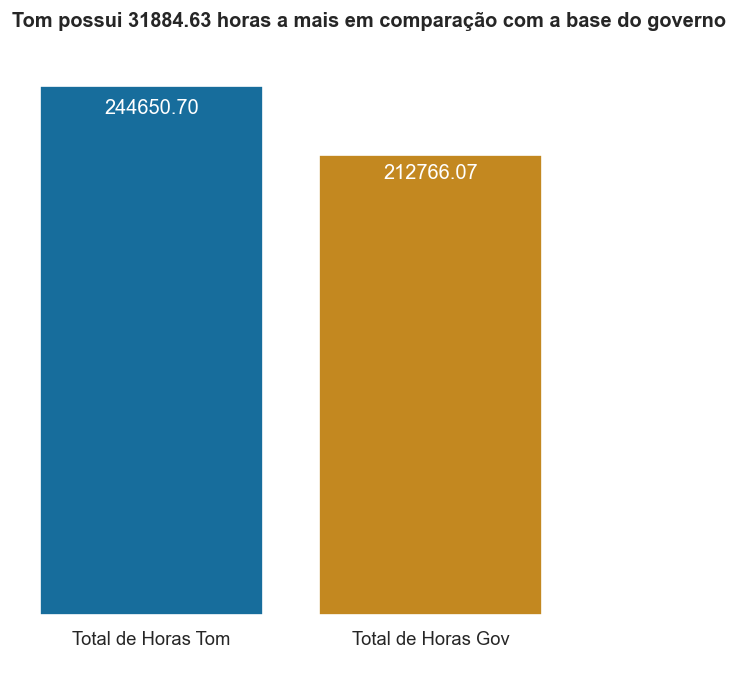

In [372]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

str_title = f'Tom possui {diff_hours:.2f} horas a mais em comparação com a base do governo'

ax = sns.barplot(x=['Total de Horas Tom', 'Total de Horas Gov'], y=[total_tom, total_gov], hue=['Total de Horas Tom', 'Total de Horas Gov'])
ax.set_title(str_title, fontsize=12, weight='bold', loc='left', pad=20)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
ax.yaxis.set_visible(False)

for spine in ['top','right','bottom','left']:
    ax.spines[spine].set_visible(False)

for bar in ax.patches:
    x = bar.get_width() / 2 + bar.get_x()
    y = bar.get_height()

    ax.text(
        x=x, y=y * 0.94,
        s=f'{y:.2f}',
        va='bottom', ha='center',
        color='white',
    )

plt.show()

In [373]:
diff_pct = (total_tom - total_gov) / total_tom * 100

print(f'A base da empresa Tom registrou um total de horas superior em {diff_pct:.2f}%')

A base da empresa Tom registrou um total de horas superior em 13.03%


In [374]:
complete['diff_abs'] = complete['ch_total_tom'] - complete['ch_total_gov']

complete.head()

,mes,codigo_escola,codigo_funcionario,categoria,ch_total_tom,fator,ch_diaria_tom,ch_total_gov,ch_diaria_gov,dias_trabalhados,ch_suprimento,diff_abs
0,Abril,ABC1,100,NAO REGENCIA,125.0,5.0,3.571429,64.28571,2.142857,30.0,15.0,60.71429
1,Abril,ABC1,100,REGENCIA,45.0,4.5,1.428571,42.85710,1.428570,30.0,10.0,2.14290
2,Abril,ABC1,101,REGENCIA,27.0,4.5,0.857143,25.71426,0.857142,30.0,6.0,1.28574
3,Abril,ABC1,102,REGENCIA,49.5,4.5,1.571429,47.14281,1.571427,30.0,11.0,2.35719
4,Abril,ABC1,103,REGENCIA,90.0,4.5,2.857143,38.57139,1.285713,30.0,9.0,51.42861


In [375]:
complete['diff_pct'] = ((complete['ch_total_tom'] - complete['ch_total_gov']) /
                            complete['ch_total_gov']) * 100

In [376]:
mean_abs_diff = complete['diff_abs'].mean()
mean_pct_diff = complete['diff_pct'].mean()

print(f'Em média, a empresa tem uma diferença de {mean_abs_diff:.2f} horas totais em relação a base do governo')
print(f'E uma média de {diff_pct:.2f}% em relação a mesma')

Em média, a empresa tem uma diferença de 12.11 horas totais em relação a base do governo
E uma média de 13.03% em relação a mesma


In [377]:
schools_comp = (
    complete
    .groupby('codigo_escola')
    .agg({
        'ch_total_tom': 'sum',
        'ch_total_gov': 'sum',
        'diff_abs': 'sum',
    })
).reset_index()


schools_comp['diff_pct'] = ((schools_comp['ch_total_tom'] - schools_comp['ch_total_gov']) /
                            schools_comp['ch_total_gov']) * 100

schools_comp

,codigo_escola,ch_total_tom,ch_total_gov,diff_abs,diff_pct
0,ABC1,6105.380000,5255.283276,850.096724,16.176040
1,ABC10,6737.290000,5381.283847,1356.006153,25.198562
2,ABC11,5855.940901,5087.283609,768.657292,15.109385
3,ABC12,6050.140000,5473.141119,576.998881,10.542372
4,ABC13,7055.990000,6295.711576,760.278424,12.076132
5,ABC14,9150.490000,7881.567188,1268.922812,16.099879
6,ABC15,7058.560000,6673.712000,384.848000,5.766626
7,ABC16,11284.230225,9649.711157,1634.519068,16.938528
8,ABC17,8097.299482,6811.569299,1285.730183,18.875682
9,ABC18,6705.630000,5617.569948,1088.060052,19.368874


In [378]:
schools = schools_comp['codigo_escola'].astype(str)
x = np.arange(len(schools))  # posições para as barras

width = 0.35

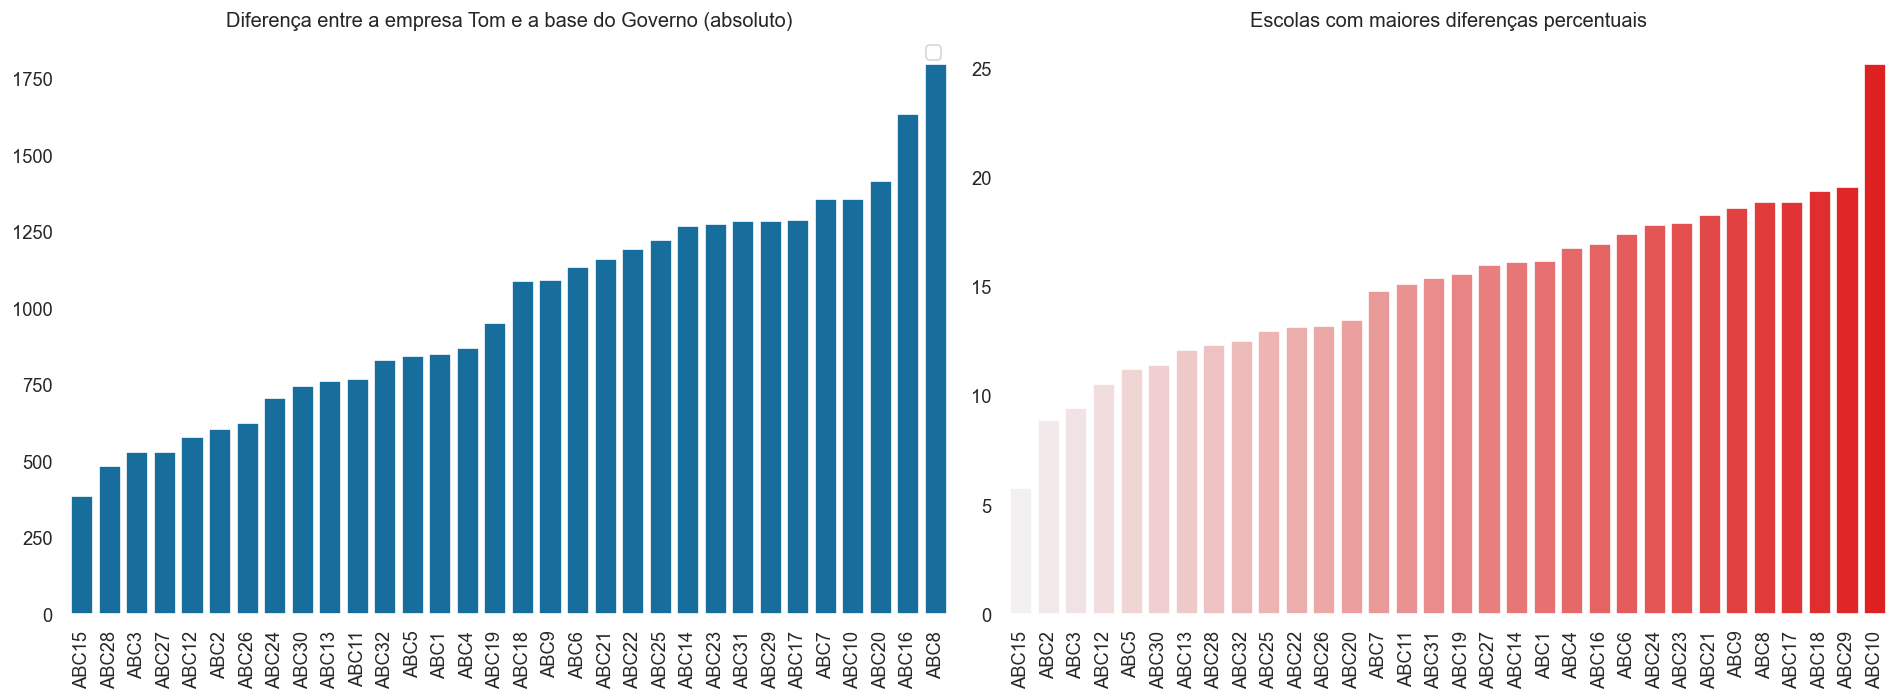

In [379]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
ax1, ax2 = axes

red_palette = sns.light_palette('red', 32)

schools_comp.sort_values('diff_abs', ascending=True, inplace=True)

sns.barplot(data=schools_comp, x='codigo_escola', y='diff_abs', ax=ax1)

ax1.set_title('Diferença entre a empresa Tom e a base do Governo (absoluto)')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xticklabels(schools_comp['codigo_escola'], rotation=90)
ax1.legend()

sns.barplot(
    data=schools_comp.sort_values('diff_pct', ascending=True),
    x='codigo_escola',
    y='diff_pct',
    palette=red_palette,
    ax=ax2,
)

ax2.set_title('Escolas com maiores diferenças percentuais')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


for spine in ['top','right','bottom','left']:
    ax1.spines[spine].set_visible(False)
    ax2.spines[spine].set_visible(False)

ax1.grid(False)
ax2.grid(False)

plt.tight_layout()
plt.show()

Por meio desta visualização podemos ter noção de quais e quanto cada escola é impactada com as divergências de cada base. Percebemos que as escolas **ABC8, ABC16, ABC20 e ABC10** são as escolas com mais registros divergentes em questões horas absolutas. Entretanto, quando observamos o segundo o gráfico que informa a proporção da divergência observamos casos diferentes: das escolas citadas anteriormente, apenas **ABC10** ocupa as posições descritas, enquanto apesar de ainda possuírem taxas de divergência relevantes, as outras escolas ocupam posições abaixo no ranking. Essa fator, pode ser descrito devido ao tamanho e a quantidade de horas (carga horária) registrada para uma mesma escola. Uma vez que em quesitos absolutos, uma escola pode ter uma alta contagem de horas absolutas divergentes, entretanto compensada pela quantidade de horas totais registradas para essa mesma escola. Enquanto uma escola pode não ter uma divergência absoluta tão significativa, porém, proporcionalmente sua divergência é alarmante.

In [380]:
regency_comp = complete.groupby('categoria').agg({
    'ch_total_tom': 'sum',
    'ch_total_gov': 'sum',
    'diff_abs': 'sum',
}).reset_index()

regency_comp.sort_values('diff_abs')

,categoria,ch_total_tom,ch_total_gov,diff_abs
0,NAO REGENCIA,59193.150000,47702.132946,11491.017054
1,REGENCIA,185457.550833,165063.932604,20393.618229


In [381]:
regency_comp['diff_pct'] = (regency_comp['ch_total_tom'] - regency_comp['ch_total_gov']) / regency_comp['ch_total_gov'] * 100

regency_comp

,categoria,ch_total_tom,ch_total_gov,diff_abs,diff_pct
0,NAO REGENCIA,59193.150000,47702.132946,11491.017054,24.089105
1,REGENCIA,185457.550833,165063.932604,20393.618229,12.354981


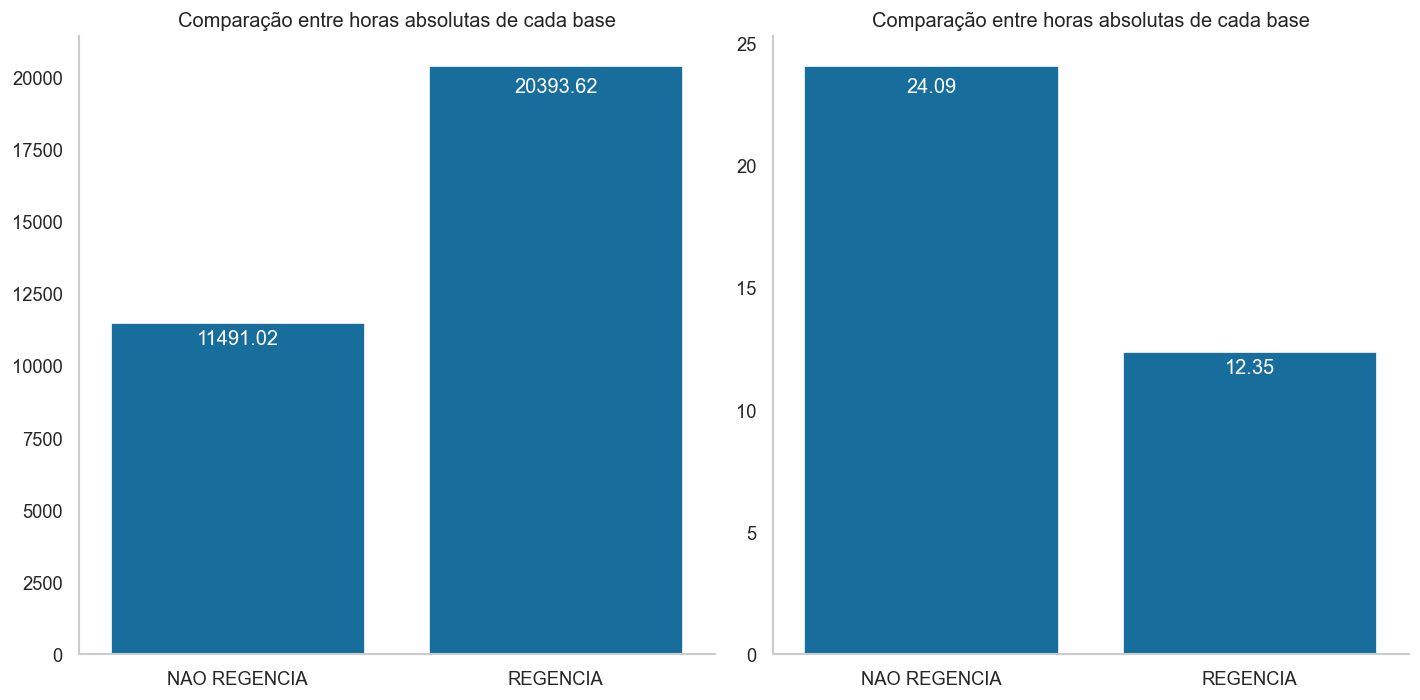

In [382]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

ax1 = axes[0]
ax2 = axes[1]

sns.barplot(data=regency_comp, x='categoria', y='diff_abs', ax=ax1)
ax1.set_title('Comparação entre horas absolutas de cada base')
ax1.set_xlabel('')
ax1.set_ylabel('')

sns.barplot(data=regency_comp, x='categoria', y='diff_pct', ax=ax2)
ax2.set_title('Comparação entre horas absolutas de cada base')
ax2.set_xlabel('')
ax2.set_ylabel('')


for spine in ['top','right']:
    ax1.spines[spine].set_visible(False)
    ax2.spines[spine].set_visible(False)

for ax in axes:
    for bar in ax.patches:
        x = bar.get_width() / 2 + bar.get_x()
        y = bar.get_height()

        ax.text(
            x=x, y=y * 0.98,
            s=f'{y:.2f}',
            va='top', ha='center',
            color='white',
        )

ax1.grid(False)
ax2.grid(False)

plt.tight_layout()
plt.show()

Apesar da diferença absoluta em horas totais ser maior em cargos de regência, observamos que sua proporção entre as bases é menor, isso pode ser explicado pelo fato de existirem mais registros de regência e consequentemente mais horas para este tipo de cargo. Entretanto, esse gráfico mostra um ponto alarmante para cargos de não regência, o que denota que, além de inconsitências no cálculo já mencionadas os registros podem sofrer com mais frequências problemas relacionada a inserção, conversão e outros relacionados. Podemos comparar se estas ocorrências estão distribuídas ao longo dos meses e das escolas igualmente.

In [383]:
months = (
    complete
    .groupby('mes')
    .agg({
        'ch_total_tom': 'sum',
        'ch_total_gov': 'sum',
        'diff_abs': 'sum'
    })
    .reset_index()
)

months

,mes,ch_total_tom,ch_total_gov,diff_abs
0,Abril,87255.331148,78358.257596,8897.073552
1,Fevereiro,76336.010000,60209.550004,16126.459996
2,Março,81059.359685,74198.257950,6861.101735


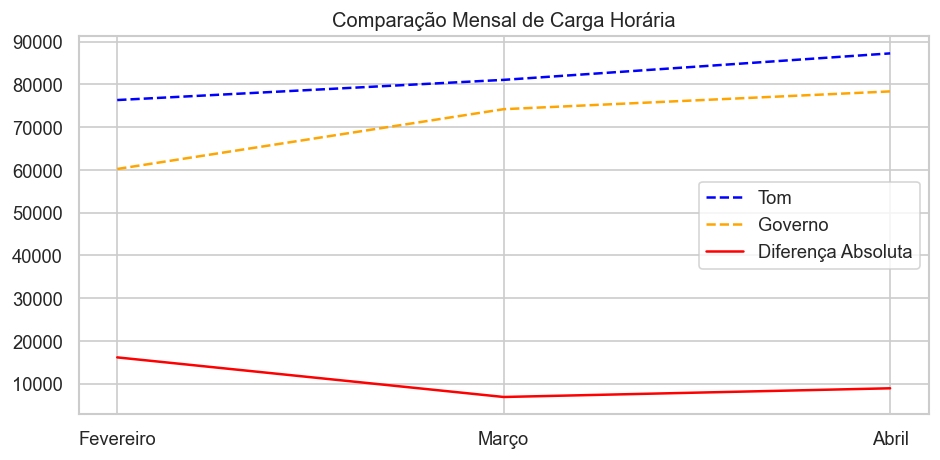

In [384]:
fig, ax = plt.subplots(figsize=(8, 4))

order = ['Fevereiro', 'Março', 'Abril']
months['mes'] = pd.Categorical(months['mes'], categories=order, ordered=True)

sns.lineplot(data=months, x='mes', y='ch_total_tom', markers='.', linestyle='--', color='blue', label='Tom')
sns.lineplot(data=months, x='mes', y='ch_total_gov', markers='.', linestyle='--', color='orange', label='Governo')
sns.lineplot(data=months, x='mes', y='diff_abs', markers='.', linestyle='-', color='red', label='Diferença Absoluta')

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Comparação Mensal de Carga Horária')
ax.legend()
plt.tight_layout()
plt.show()

Aqui observamos que o mês com mais diferença é Feveireiro, seguido por Abril e Março. Além disso, percebemos um ligeiro aumento no mês de Março para Abril. Vamos comparar por escolas e, finalmente por mes os cargos.

In [385]:
regency_per_school = (
    complete
    .groupby(['codigo_escola', 'categoria'])
    .agg({
        'ch_total_tom': 'sum',
        'ch_total_gov': 'sum',
        'diff_abs': 'sum'
    })
    .reset_index()
)

regency_per_school.sort_values('diff_abs', inplace=True)
regency_per_school

,codigo_escola,categoria,ch_total_tom,ch_total_gov,diff_abs
58,ABC7,NAO REGENCIA,600.000000,508.571330,91.428670
20,ABC19,NAO REGENCIA,646.660000,548.571269,98.088731
4,ABC11,NAO REGENCIA,938.660000,779.999822,158.660178
36,ABC26,NAO REGENCIA,756.670000,577.142680,179.527320
22,ABC2,NAO REGENCIA,1125.990000,944.142719,181.847281
13,ABC15,REGENCIA,5978.900000,5790.426426,188.473574
12,ABC15,NAO REGENCIA,1079.660000,883.285574,196.374426
38,ABC27,NAO REGENCIA,1060.000000,853.571260,206.428740
30,ABC23,NAO REGENCIA,1087.990000,875.999855,211.990145
44,ABC3,NAO REGENCIA,1119.990000,905.714010,214.275990


In [386]:
regency_per_school['diff_pct'] = (regency_per_school['ch_total_tom'] - regency_per_school['ch_total_gov']) / regency_per_school['ch_total_gov'] * 100

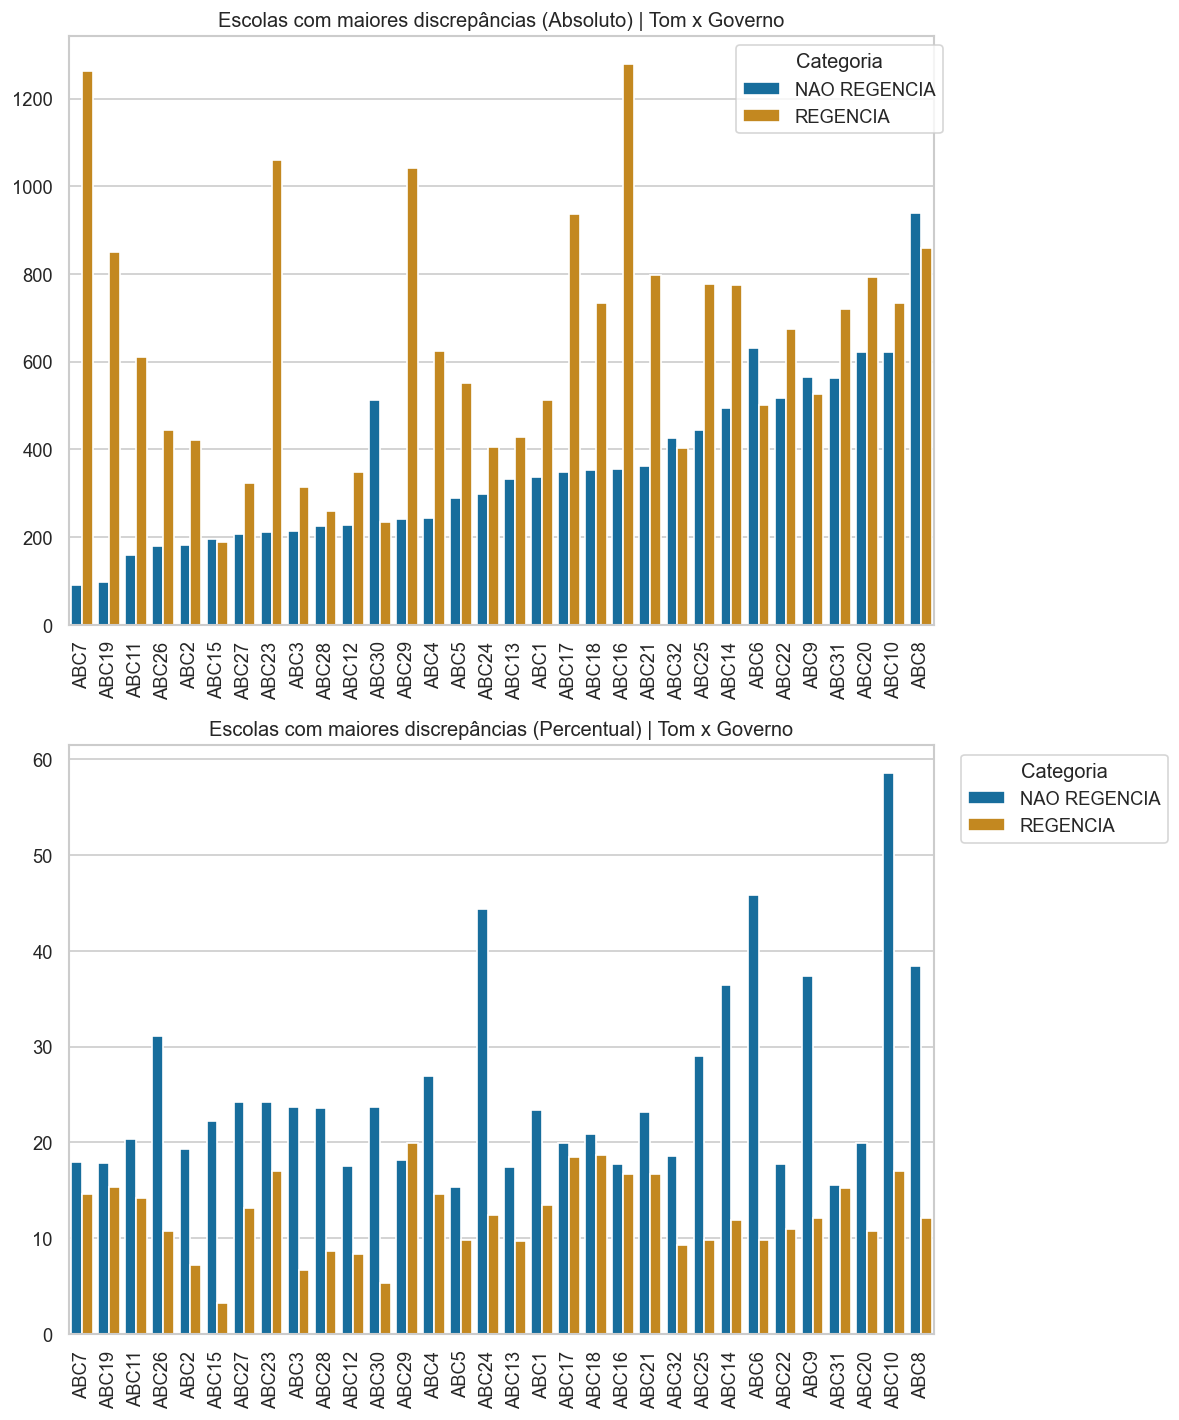

In [387]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

ax1 = axes[0]
ax2 = axes[1]

sns.barplot(
    data=regency_per_school,
    y='diff_abs',
    x='codigo_escola',
    hue='categoria',
    ax=ax1
)

sns.barplot(
    data=regency_per_school,
    y='diff_pct',
    x='codigo_escola',
    hue='categoria',
    ax=ax2
)


ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.tick_params(axis='x', labelrotation=90)
ax1.set_title('Escolas com maiores discrepâncias (Absoluto) | Tom x Governo')
ax1.legend(title='Categoria', bbox_to_anchor=(1.02, 1))

ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.tick_params(axis='x', labelrotation=90)
ax2.set_title('Escolas com maiores discrepâncias (Percentual) | Tom x Governo')
ax2.legend(title='Categoria', bbox_to_anchor=(1.02, 1))


plt.tight_layout()
plt.show()

Aqui observamos outro caso alarmante em relacao aos cargos de regencia e nao regencia. Existem escolas que possuem mais de 60% do seu percentual de diferença, o que denota uma significativa taxa de risco, visto que os pagamentos estao sendo repassados errados. 

In [388]:
regency_per_month_comp = complete.groupby(['mes', 'categoria']).agg({
    'ch_total_tom': 'sum',
    'ch_total_gov': 'sum',
    'diff_abs': 'sum',
}).reset_index()

regency_per_month_comp.sort_values('diff_abs', inplace=True)
regency_per_month_comp

,mes,categoria,ch_total_tom,ch_total_gov,diff_abs
4,Março,NAO REGENCIA,18805.710000,16329.138980,2476.571020
0,Abril,NAO REGENCIA,22142.320000,18028.425076,4113.894924
5,Março,REGENCIA,62253.649685,57869.118970,4384.530715
1,Abril,REGENCIA,65113.011148,60329.832520,4783.178628
2,Fevereiro,NAO REGENCIA,18245.120000,13344.568890,4900.551110
3,Fevereiro,REGENCIA,58090.890000,46864.981114,11225.908886


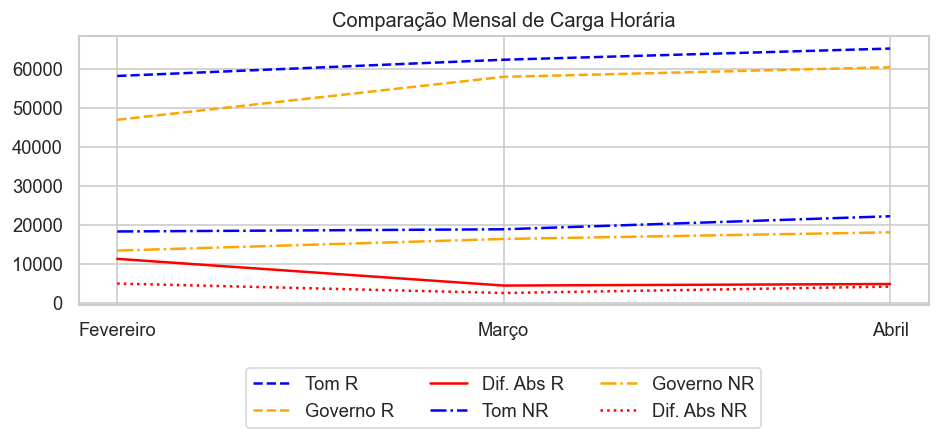

In [389]:
order = ['Fevereiro', 'Março', 'Abril']
regency_per_month_comp['mes'] = pd.Categorical(
    regency_per_month_comp['mes'],
    categories=order,
    ordered=True
)

# 2) Mapeamentos de estilo e rótulos
linestyles = {
    'REGENCIA': '--',
    'NAO REGENCIA': '-.'
}
diff_linestyles = {
    'REGENCIA': '-',
    'NAO REGENCIA': ':'
}
colors = {
    'ch_total_tom': 'blue',
    'ch_total_gov': 'orange',
    'diff_abs': 'red'
}
labels_tom  = {'REGENCIA': 'Tom R',      'NAO REGENCIA': 'Tom NR'}
labels_gov  = {'REGENCIA': 'Governo R',  'NAO REGENCIA': 'Governo NR'}
labels_diff = {'REGENCIA': 'Dif. Abs R', 'NAO REGENCIA': 'Dif. Abs NR'}

# 3) Plot
fig, ax = plt.subplots(figsize=(8, 4))

for cat in ['REGENCIA', 'NAO REGENCIA']:
    df = regency_per_month_comp[regency_per_month_comp['categoria'] == cat]

    sns.lineplot(
        data=df, x='mes', y='ch_total_tom',
        linestyle=linestyles[cat],
        color=colors['ch_total_tom'],
        label=labels_tom[cat],
        ax=ax
    )
    sns.lineplot(
        data=df, x='mes', y='ch_total_gov',
        linestyle=linestyles[cat],
        color=colors['ch_total_gov'],
        label=labels_gov[cat],
        ax=ax
    )
    sns.lineplot(
        data=df, x='mes', y='diff_abs',
        linestyle=diff_linestyles[cat],
        color=colors['diff_abs'],
        label=labels_diff[cat],
        ax=ax
    )

# 4) Ajustes finais
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Comparação Mensal de Carga Horária')
ax.legend(ncol=3, bbox_to_anchor=(0.5, -0.2), loc='upper center')
plt.tight_layout()
plt.show()

In [390]:
schools_per_month = (
    complete
    .groupby(['mes', 'codigo_escola'])
    .agg({
        'ch_total_tom': 'sum',
        'ch_total_gov': 'sum',
        'diff_abs': 'sum'
    })
    .reset_index()
)

schools_per_month.sort_values('diff_abs', inplace=True)
schools_per_month

,mes,codigo_escola,ch_total_tom,ch_total_gov,diff_abs
6,Abril,ABC15,2432.000000,2519.999208,-87.999208
68,Março,ABC13,2261.750000,2225.856212,35.893788
70,Março,ABC15,2308.750000,2265.427776,43.322224
67,Março,ABC12,2013.400000,1930.142293,83.257707
83,Março,ABC27,1292.500000,1208.285326,84.214674
23,Abril,ABC30,2484.050000,2398.284791,85.765209
22,Abril,ABC3,2050.670000,1963.856461,86.813539
80,Março,ABC24,1569.750000,1468.713553,101.036447
91,Março,ABC5,2667.400000,2563.570610,103.829390
84,Março,ABC28,1470.000000,1363.713724,106.286276


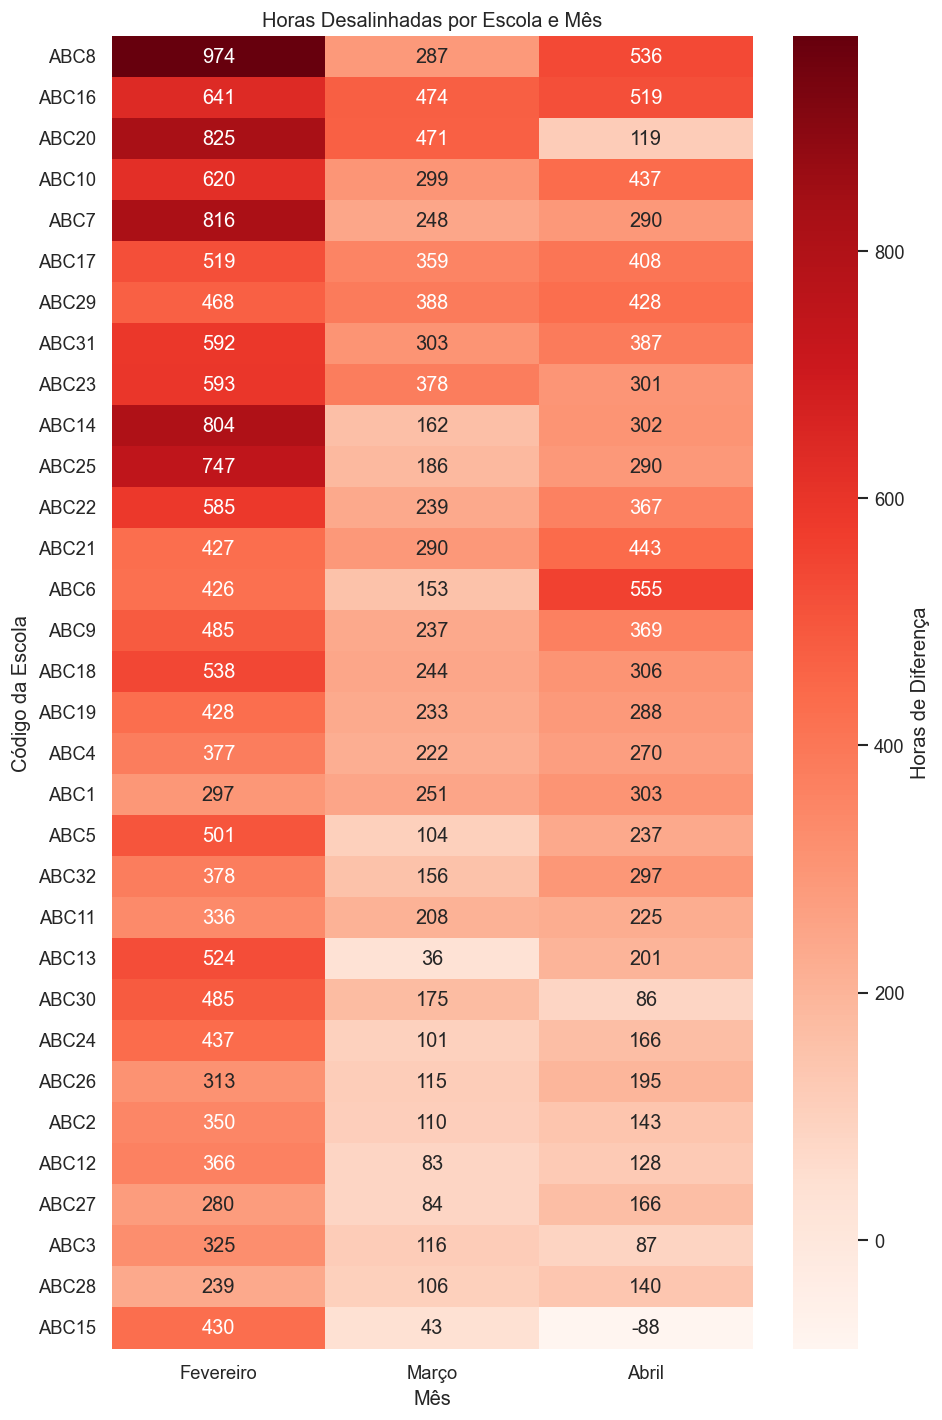

In [391]:
schools_per_month['mes'] = pd.Categorical(
    schools_per_month['mes'],
    categories=order,
    ordered=True
)

pivot = schools_per_month.pivot(
    index='codigo_escola',
    columns='mes',
    values='diff_abs'
).fillna(0)

order = ['Fevereiro', 'Março', 'Abril']

pivot = pivot.loc[pivot.sum(axis=1).sort_values(ascending=False).index]


plt.figure(figsize=(8,12))
sns.heatmap(
    pivot,
    annot=True, fmt='.0f',
    cmap='Reds',
    cbar_kws={'label': 'Horas de Diferença'}
)
plt.title('Horas Desalinhadas por Escola e Mês')
plt.ylabel('Código da Escola')
plt.xlabel('Mês')
plt.tight_layout()
plt.show()

Novamente, Feveiro denota situaçoes alarmantes para a diferença entre as escolas. Entretanto, deve-se levar em consideraçao o cálculo regente por cada base, visto que Fevereiro possui menos dias e consequemente menos dias úteis. Dessa forma, a fórmula para o cálculo da base da empresa necessita de um reajuste.